In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:

df=pd.read_csv('/content/sample_data/household_power_consumption.txt',sep=';')

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.shape

(48424, 9)

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Date : ['16/12/2006' '17/12/2006' '18/12/2006' '19/12/2006' '20/12/2006'
 '21/12/2006' '22/12/2006' '23/12/2006' '24/12/2006' '25/12/2006'
 '26/12/2006' '27/12/2006' '28/12/2006' '29/12/2006' '30/12/2006'
 '31/12/2006' '1/1/2007' '2/1/2007' '3/1/2007' '4/1/2007' '5/1/2007'
 '6/1/2007' '7/1/2007' '8/1/2007' '9/1/2007' '10/1/2007' '11/1/2007'
 '12/1/2007' '13/1/2007' '14/1/2007' '15/1/2007' '16/1/2007' '17/1/2007'
 '18/1/2007' '19/1/2007']
Time : ['17:24:00' '17:25:00' '17:26:00' ... '17:21:00' '17:22:00' '17:23:00']
Global_active_power : ['4.216' '5.360' '5.374' ... '6.370' '5.344' '6.132']
Global_reactive_power : ['0.418' '0.436' '0.498' '0.502' '0.528' '0.522' '0.520' '0.510' '0.470'
 '0.478' '0.398' '0.422' '0.282' '0.152' '0.156' '0.000' '0.076' '0.090'
 '0.200' '0.058' '0.180' '0.144' '0.118' '0.108' '0.202' '0.192' '0.186'
 '0.116' '0.136' '0.148' '0.160' '0.158' '0.100' '0.082' '0.050' '0.052'
 '0.162' '0.086' '0.048' '0.054' '0.068' '0.166' '0.174' '0.178' '0.188'
 '0.088' '0.08

In [ ]:
df.replace('?','nan',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48424 entries, 0 to 48423
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   48424 non-null  object 
 1   Time                   48424 non-null  object 
 2   Global_active_power    48424 non-null  object 
 3   Global_reactive_power  48424 non-null  object 
 4   Voltage                48424 non-null  object 
 5   Global_intensity       48424 non-null  object 
 6   Sub_metering_1         48424 non-null  object 
 7   Sub_metering_2         48424 non-null  object 
 8   Sub_metering_3         48419 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.3+ MB


In [ ]:
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)


In [ ]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      5
Global_reactive_power    5
Voltage                  5
Global_intensity         5
Sub_metering_1           5
Sub_metering_2           5
Sub_metering_3           5
dtype: int64

In [ ]:
df.Sub_metering_3.fillna(df['Sub_metering_3'].median(),inplace=True)
df.Voltage.fillna(df['Voltage'].median(),inplace=True)
df.Global_intensity.fillna(df['Global_intensity'].median(),inplace=True)
df.Sub_metering_1.fillna(df['Sub_metering_1'].median(),inplace=True)
df.Sub_metering_2.fillna(df['Sub_metering_2'].median(),inplace=True)
df.Global_active_power.fillna(df['Global_active_power'].median(),inplace=True)
df.Global_reactive_power.fillna(df['Global_reactive_power'].median(),inplace=True)

In [ ]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48424 entries, 0 to 48423
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   48424 non-null  object 
 1   Time                   48424 non-null  object 
 2   Global_active_power    48424 non-null  float64
 3   Global_reactive_power  48424 non-null  float64
 4   Voltage                48424 non-null  float64
 5   Global_intensity       48424 non-null  float64
 6   Sub_metering_1         48424 non-null  float64
 7   Sub_metering_2         48424 non-null  float64
 8   Sub_metering_3         48424 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.3+ MB


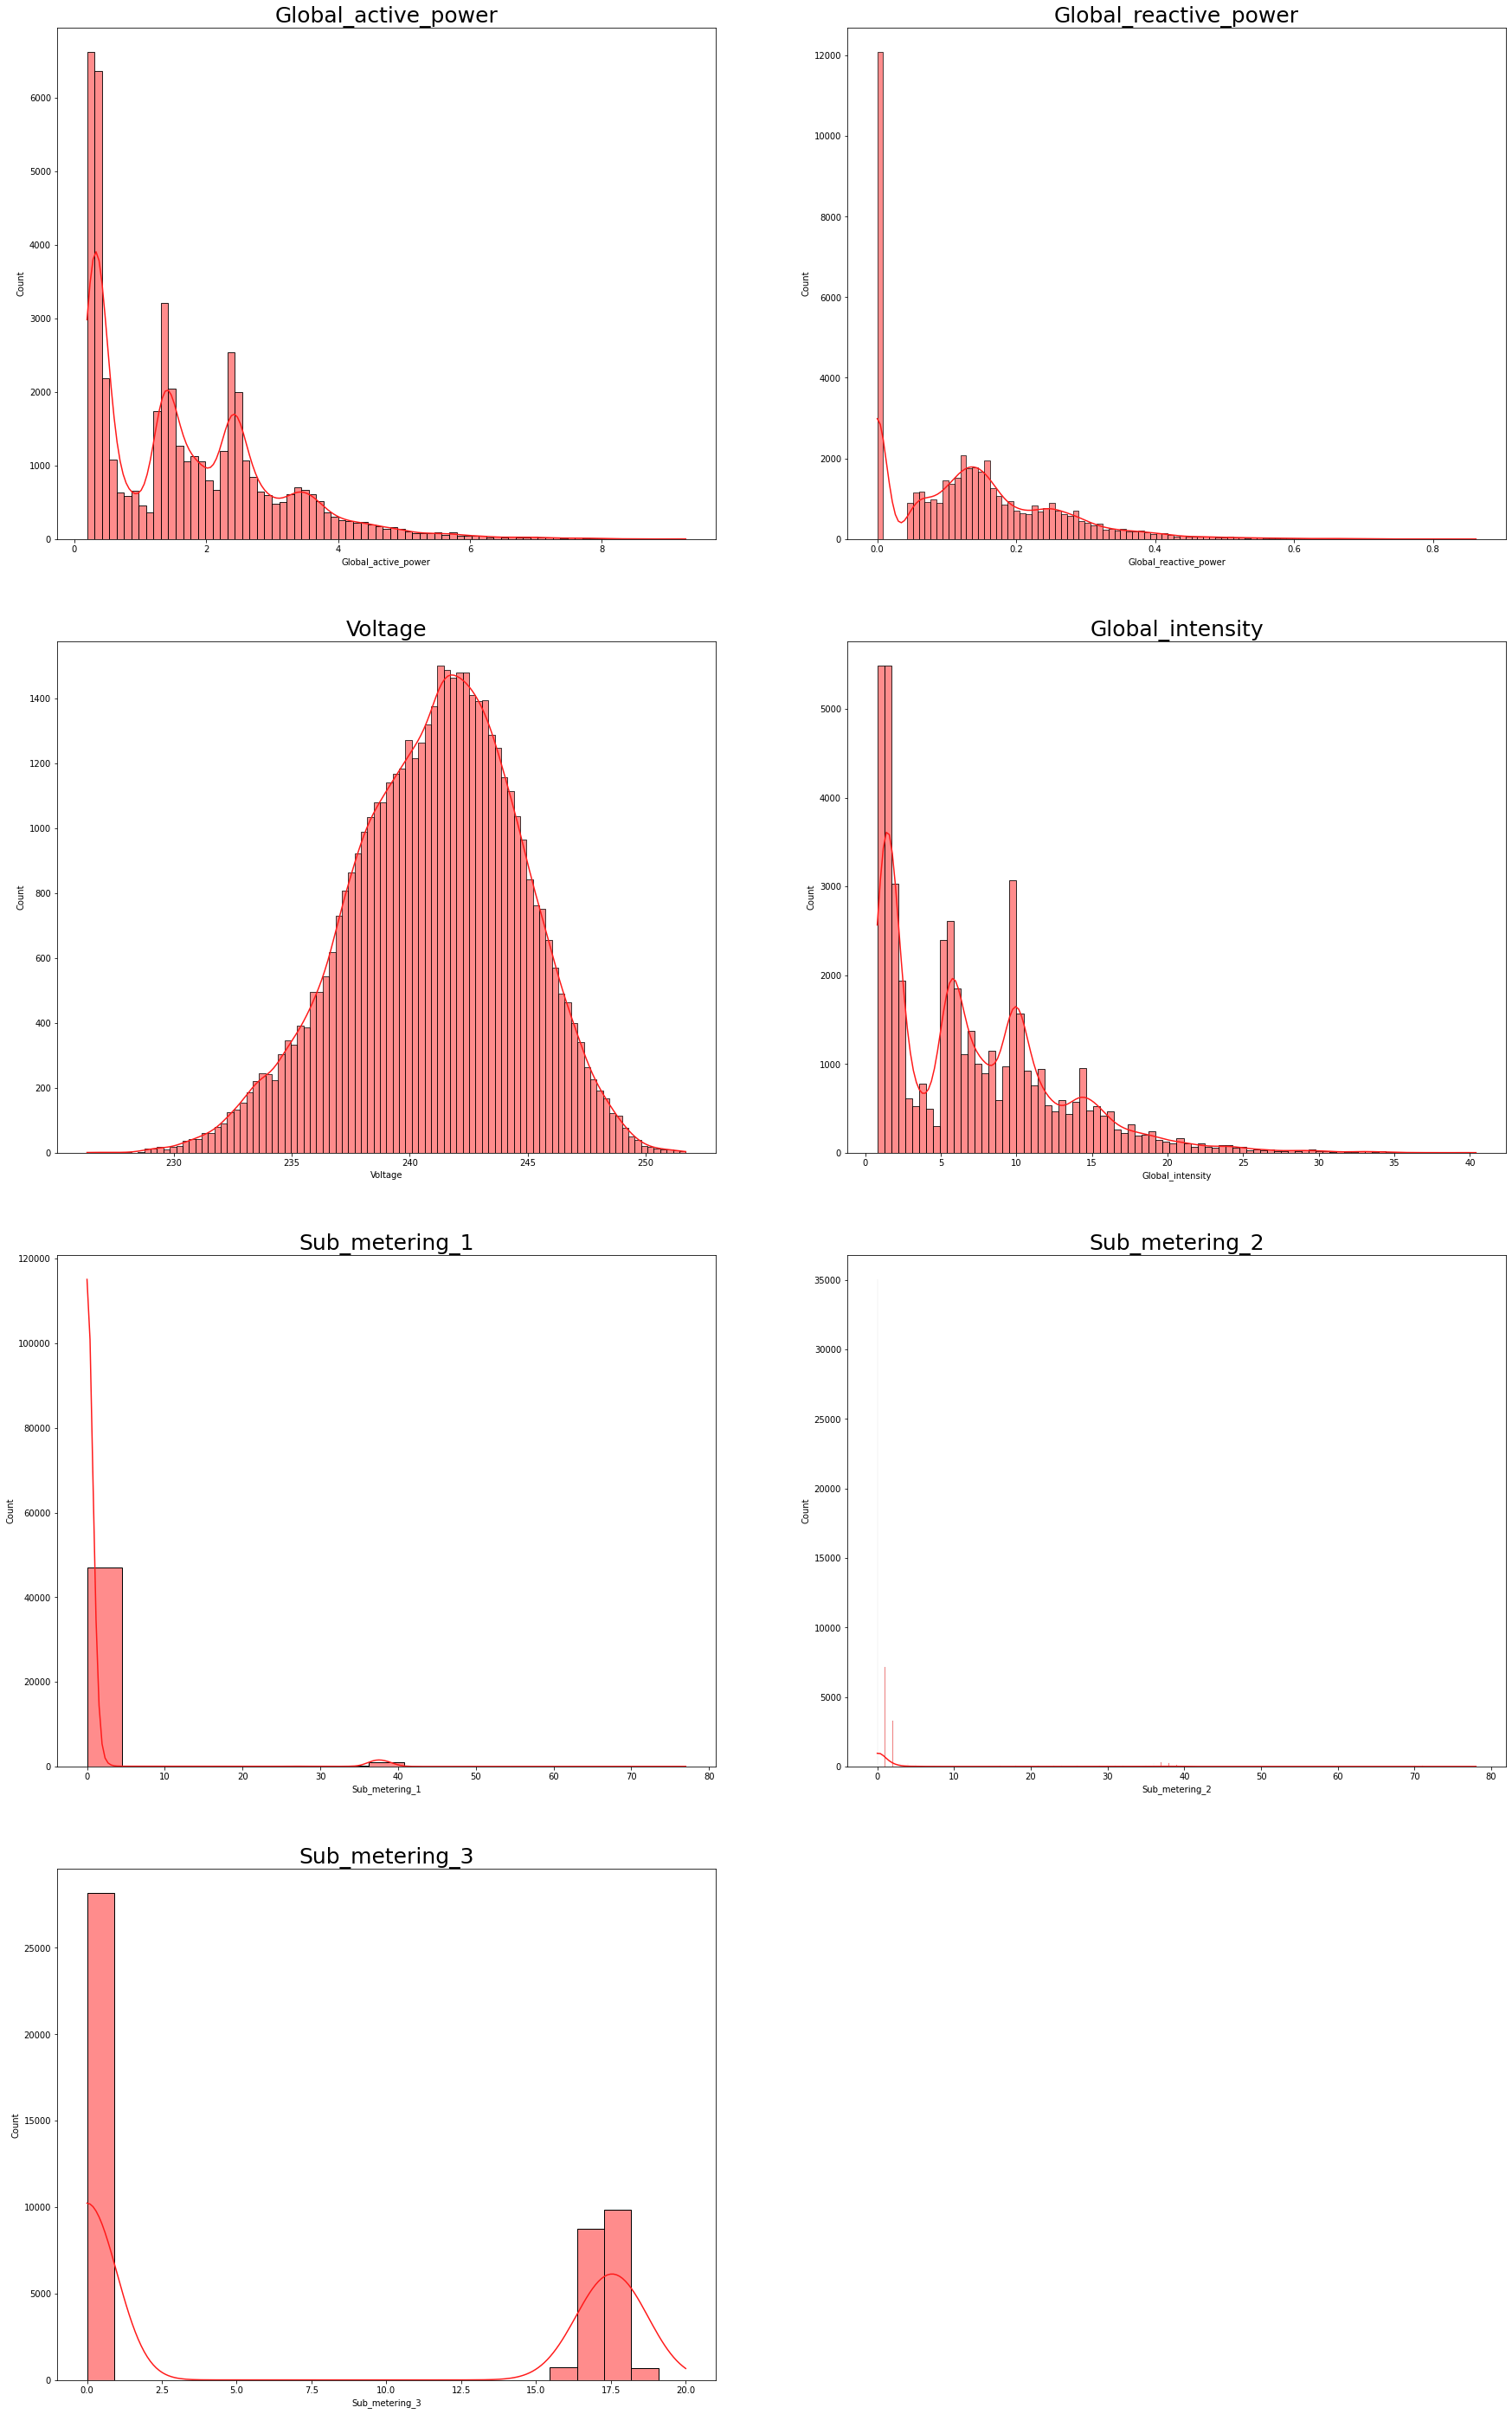

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
plt.figure(figsize=(30, 50))
for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.histplot(data = df,x = df[numeric_features[i]],edgecolor='black',color='#ff1a1a',kde=True)
    plt.title(numeric_features[i],color='black',size=25)

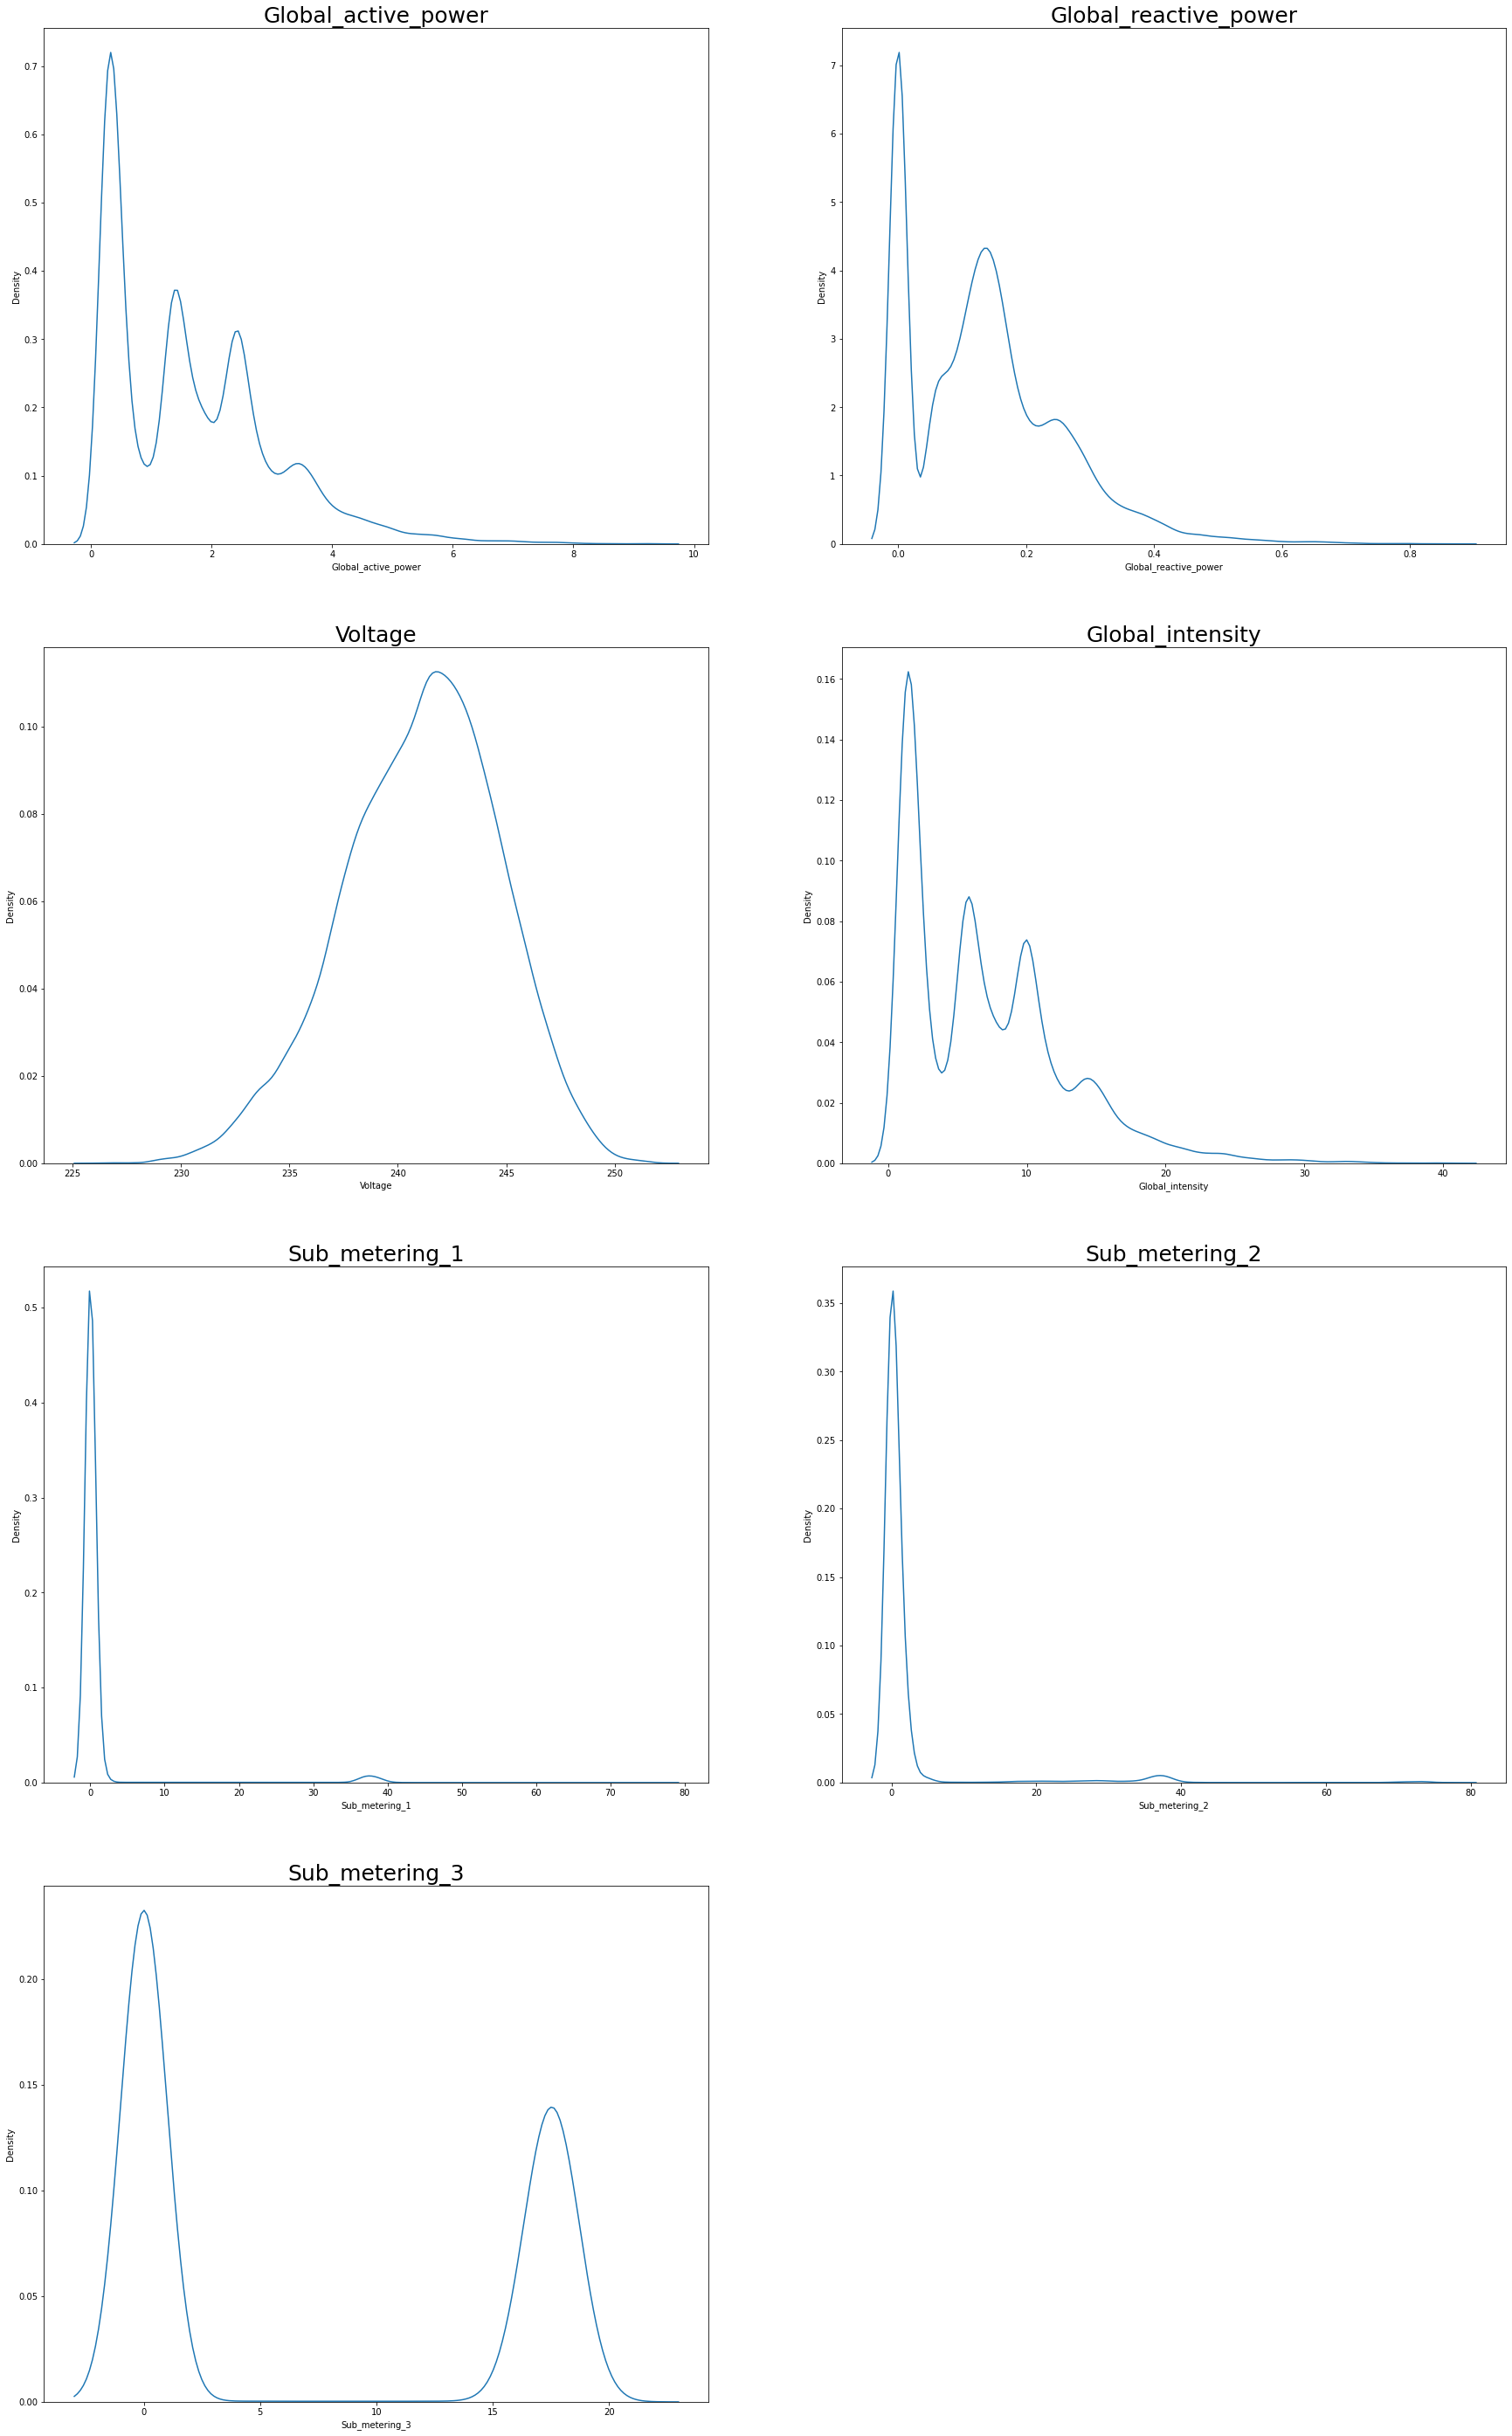

In [ ]:
plt.figure(figsize=(30, 50))
for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(data = df,x = df[numeric_features[i]])
    plt.title(numeric_features[i],color='black',size=25)

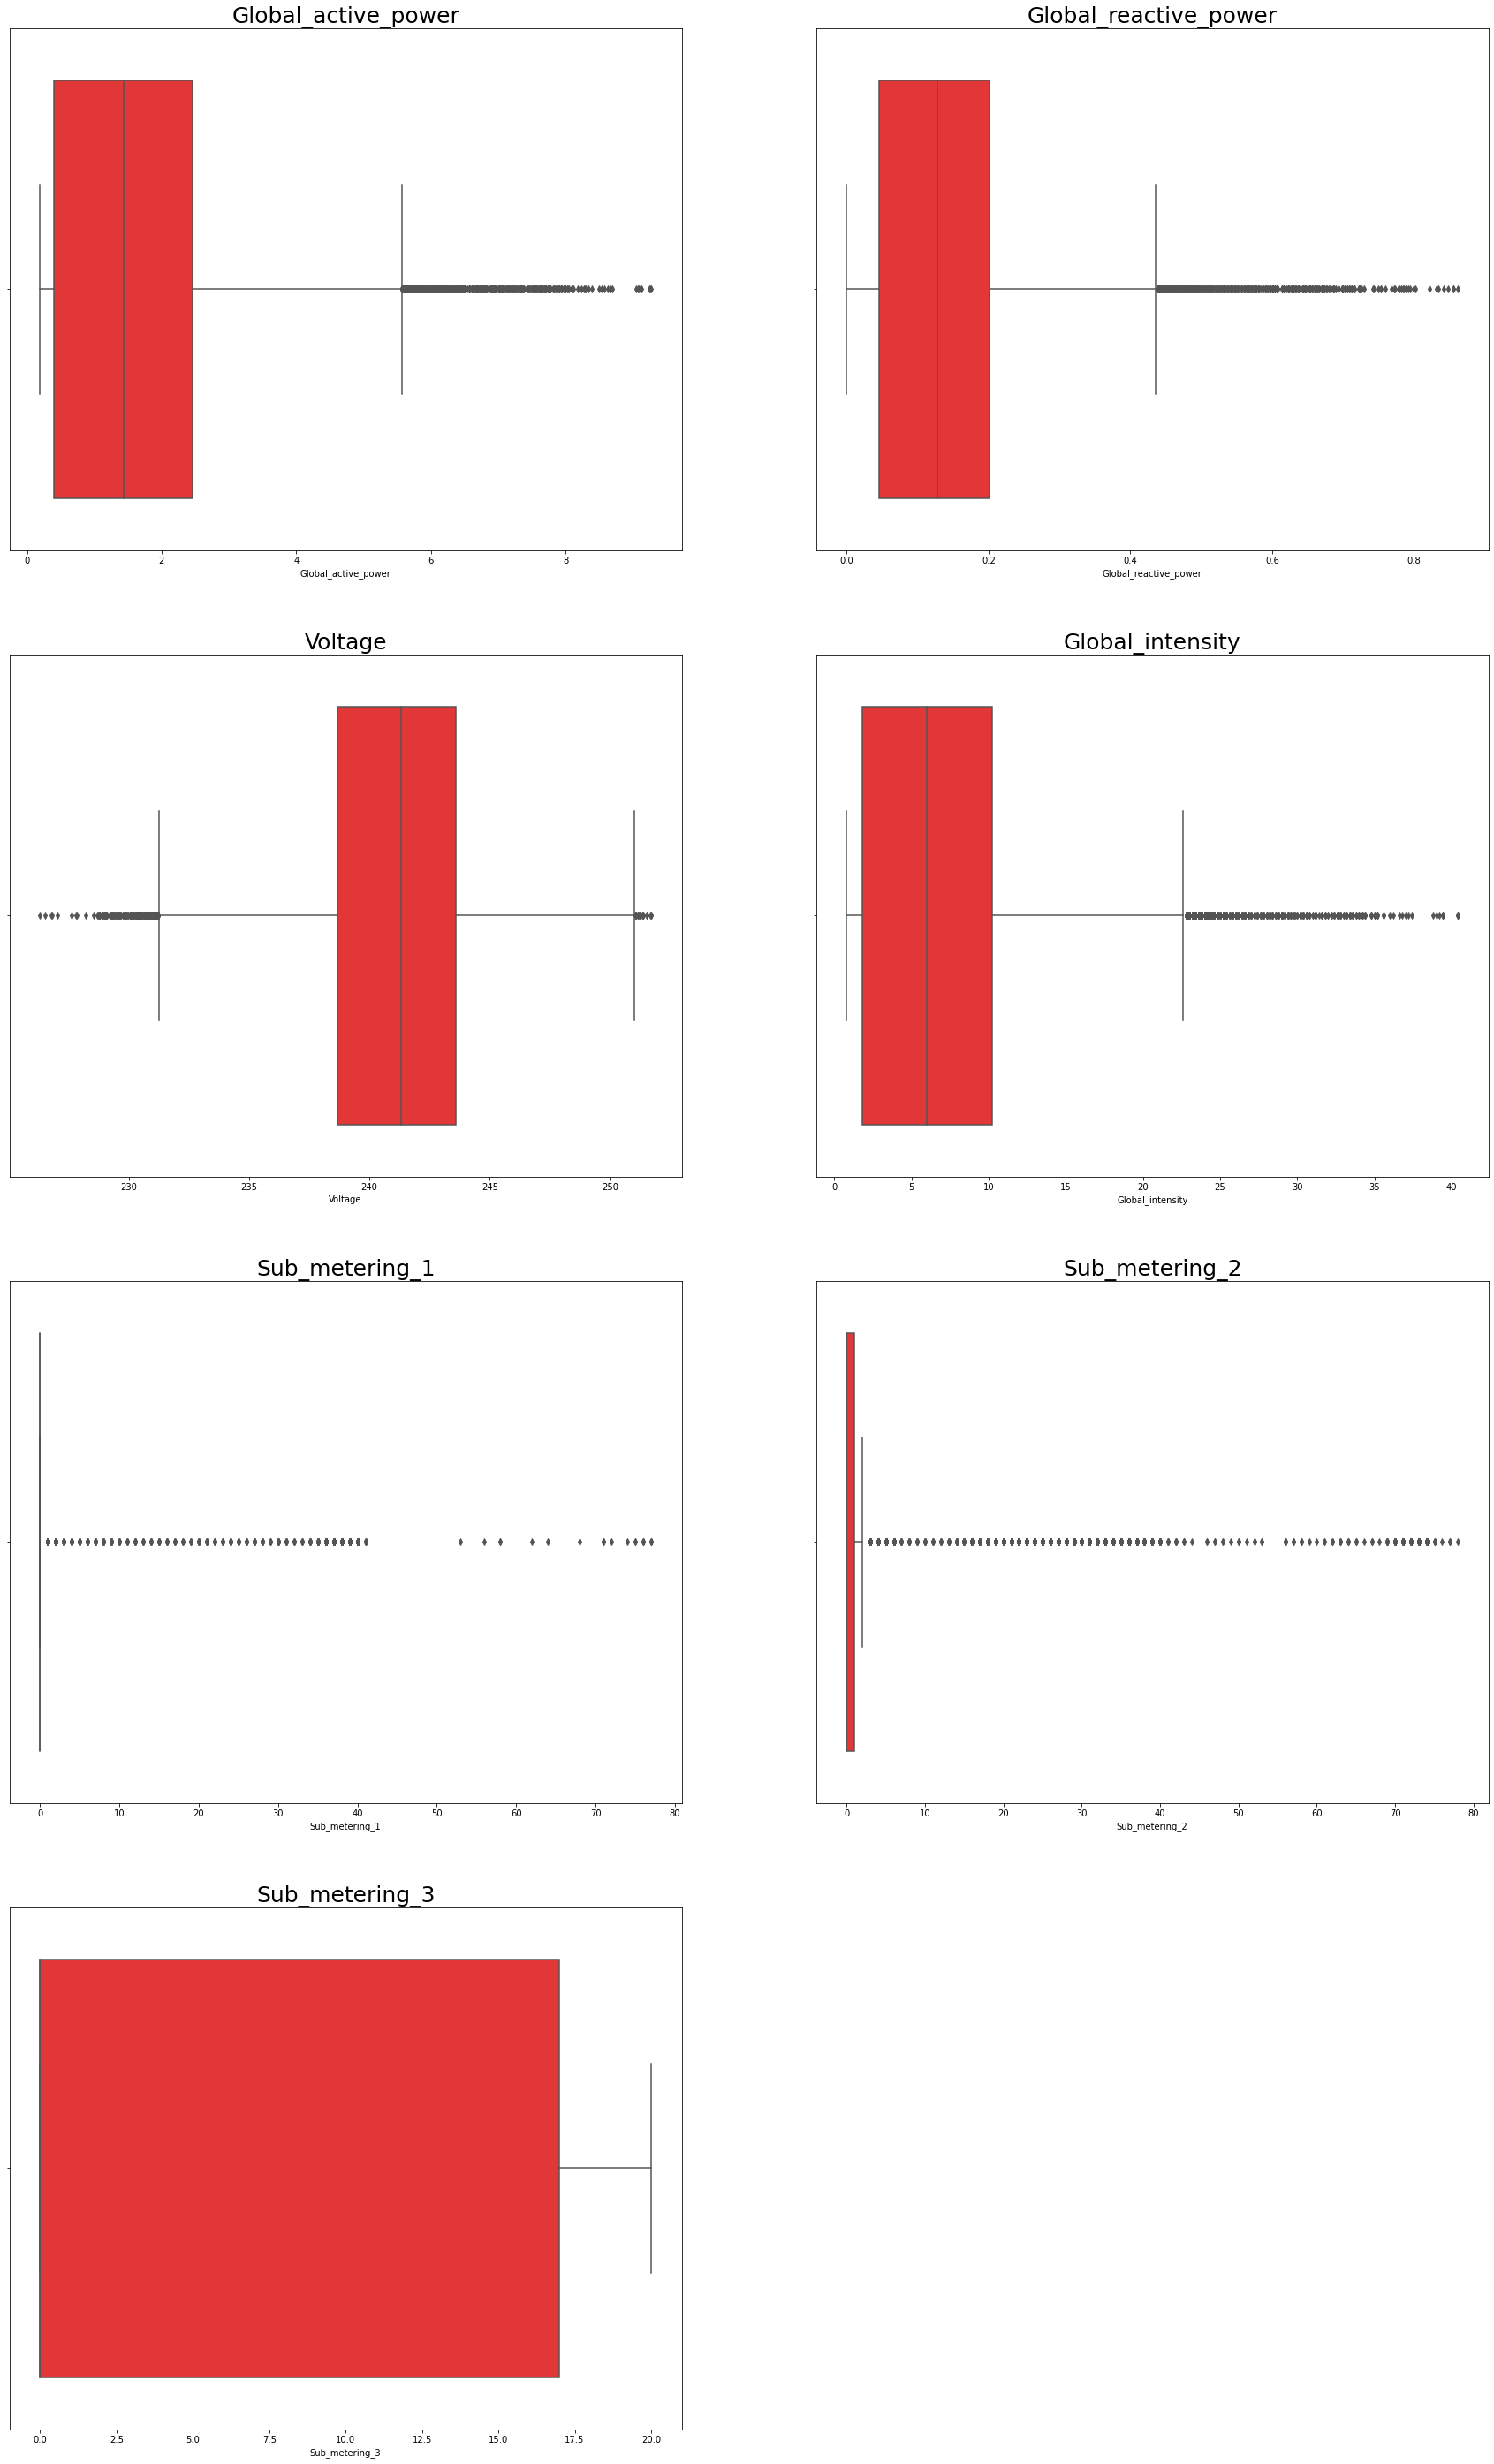

In [ ]:
plt.figure(figsize=(30, 50))
for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data = df,x = df[numeric_features[i]],color='#ff1a1a')
    plt.title(numeric_features[i],color='black',size=25)

In [ ]:
# Target Variable
eq1 = (df['Global_active_power']*1000/60) 
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = eq1 - eq2
df.head()



,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


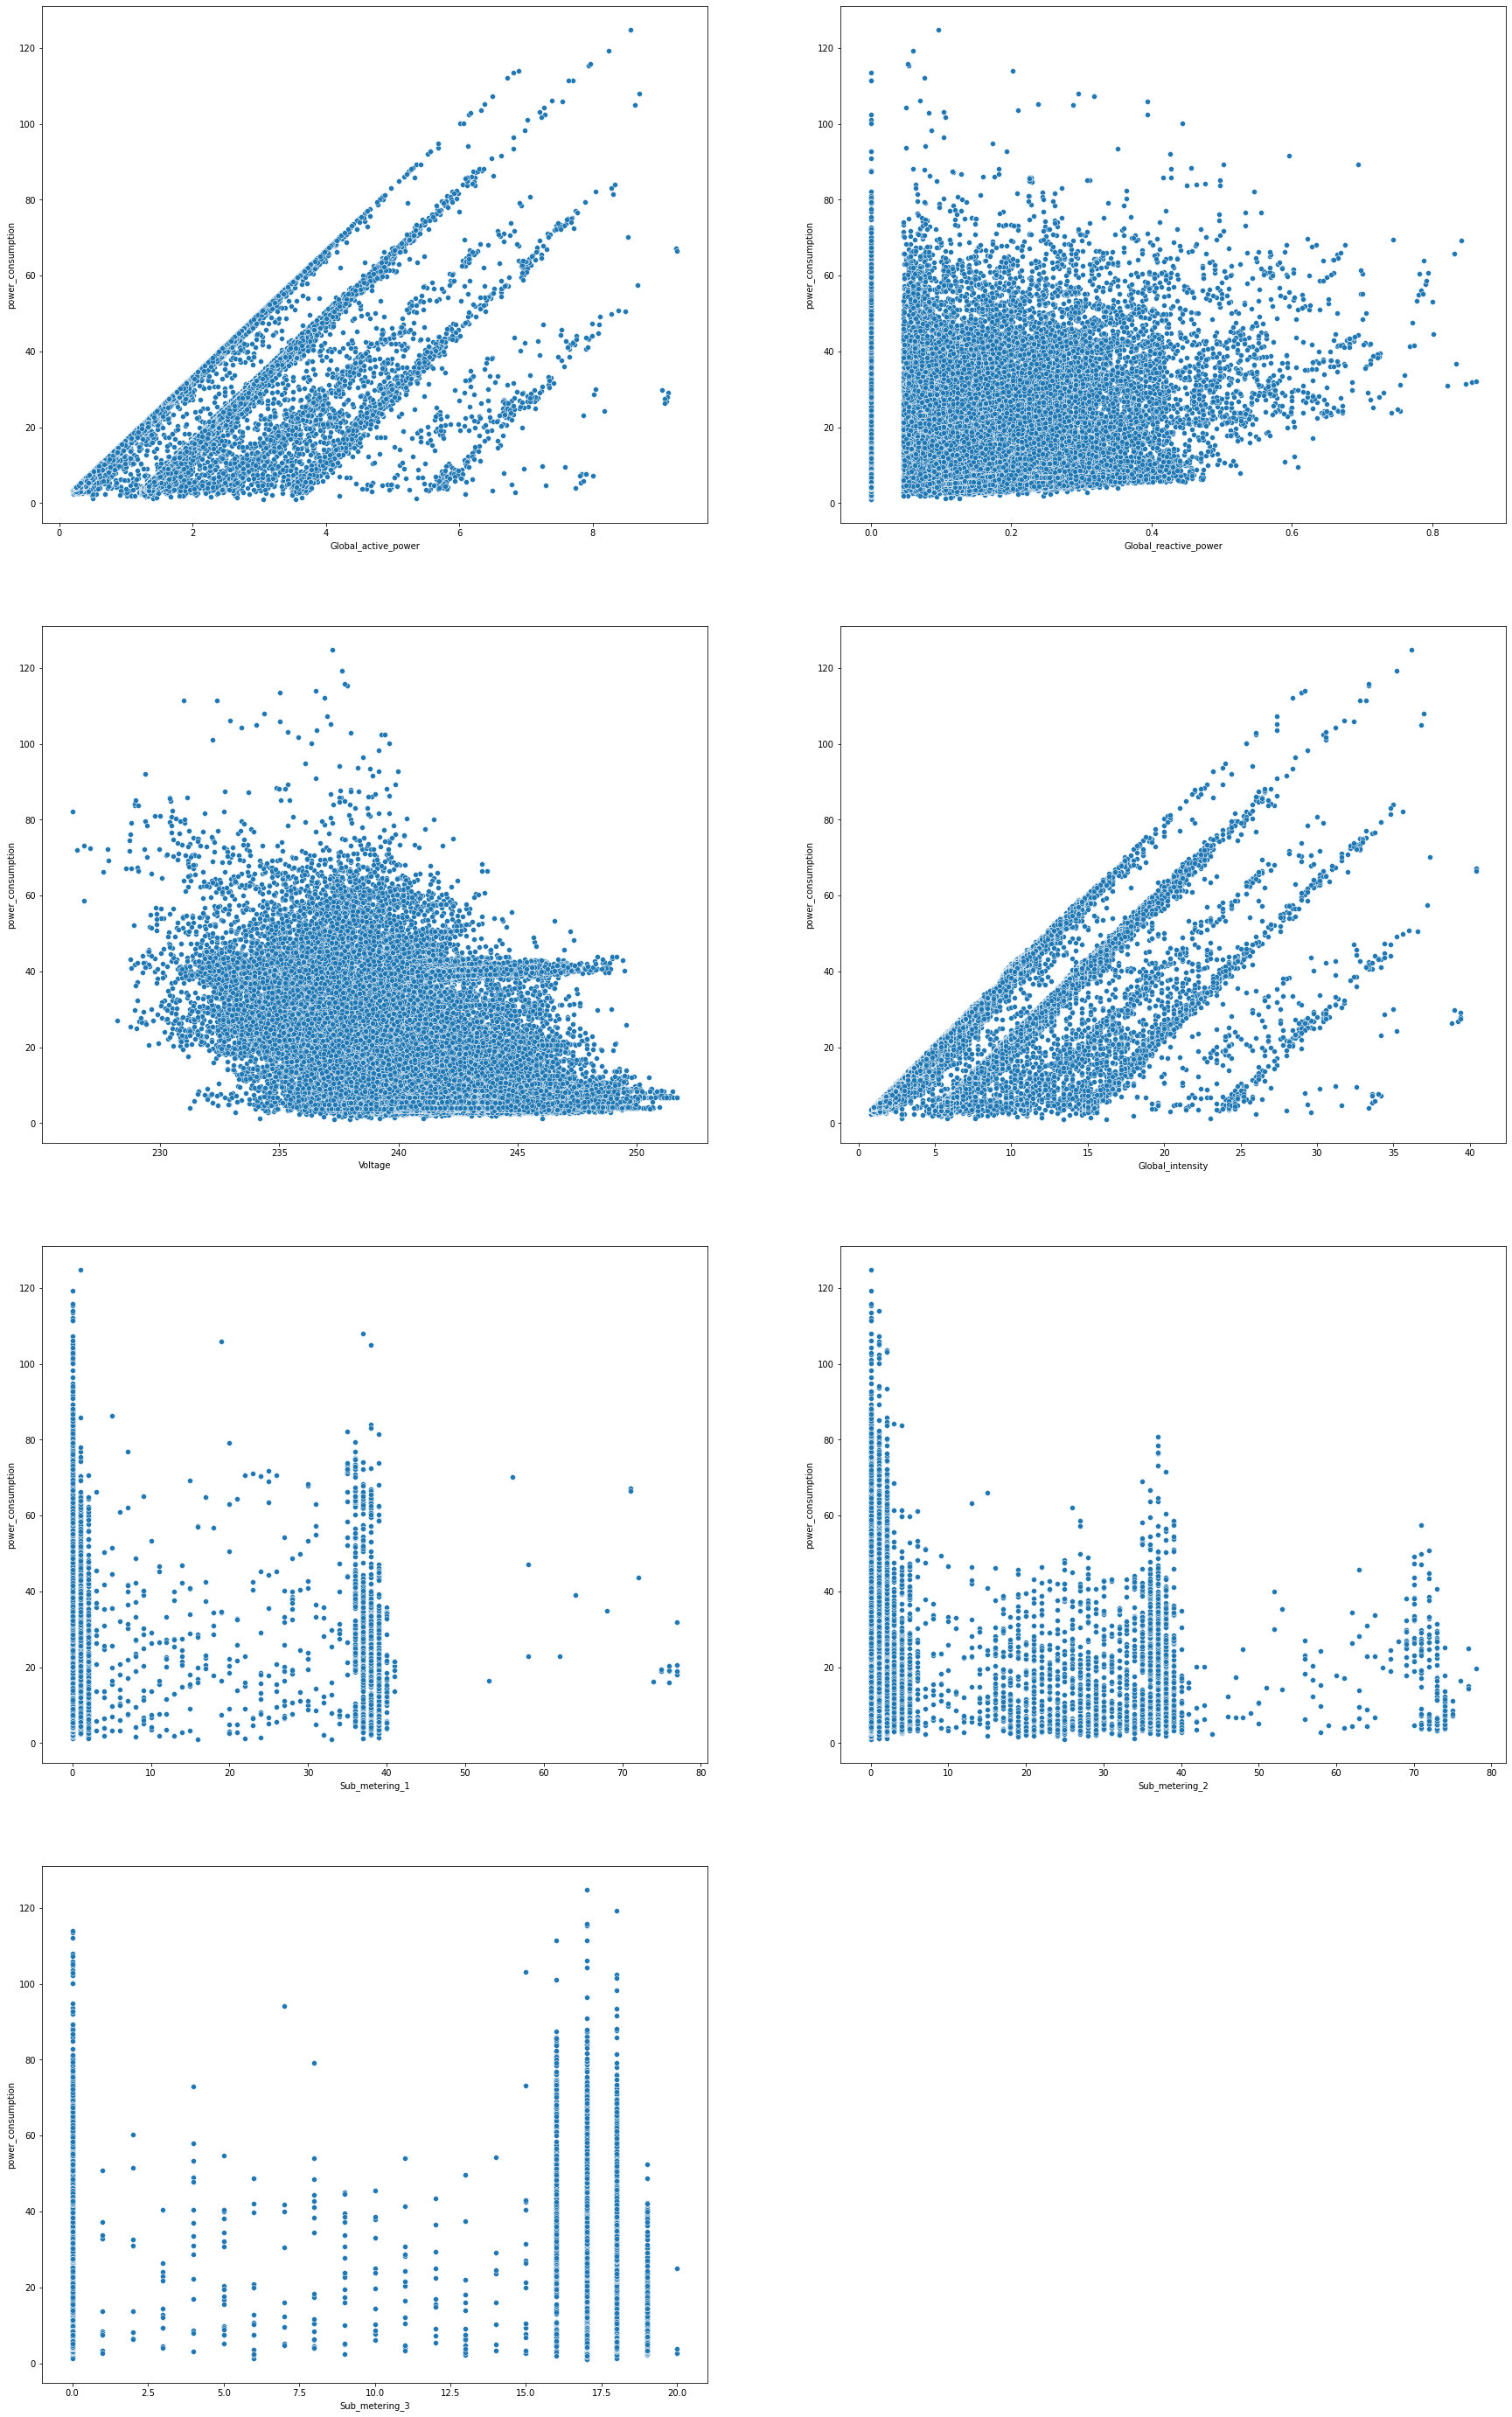

In [ ]:
plt.figure(figsize=(30, 50))
for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x=df[numeric_features[i]],y=df['power_consumption'])

<Figure size 2160x3600 with 0 Axes>

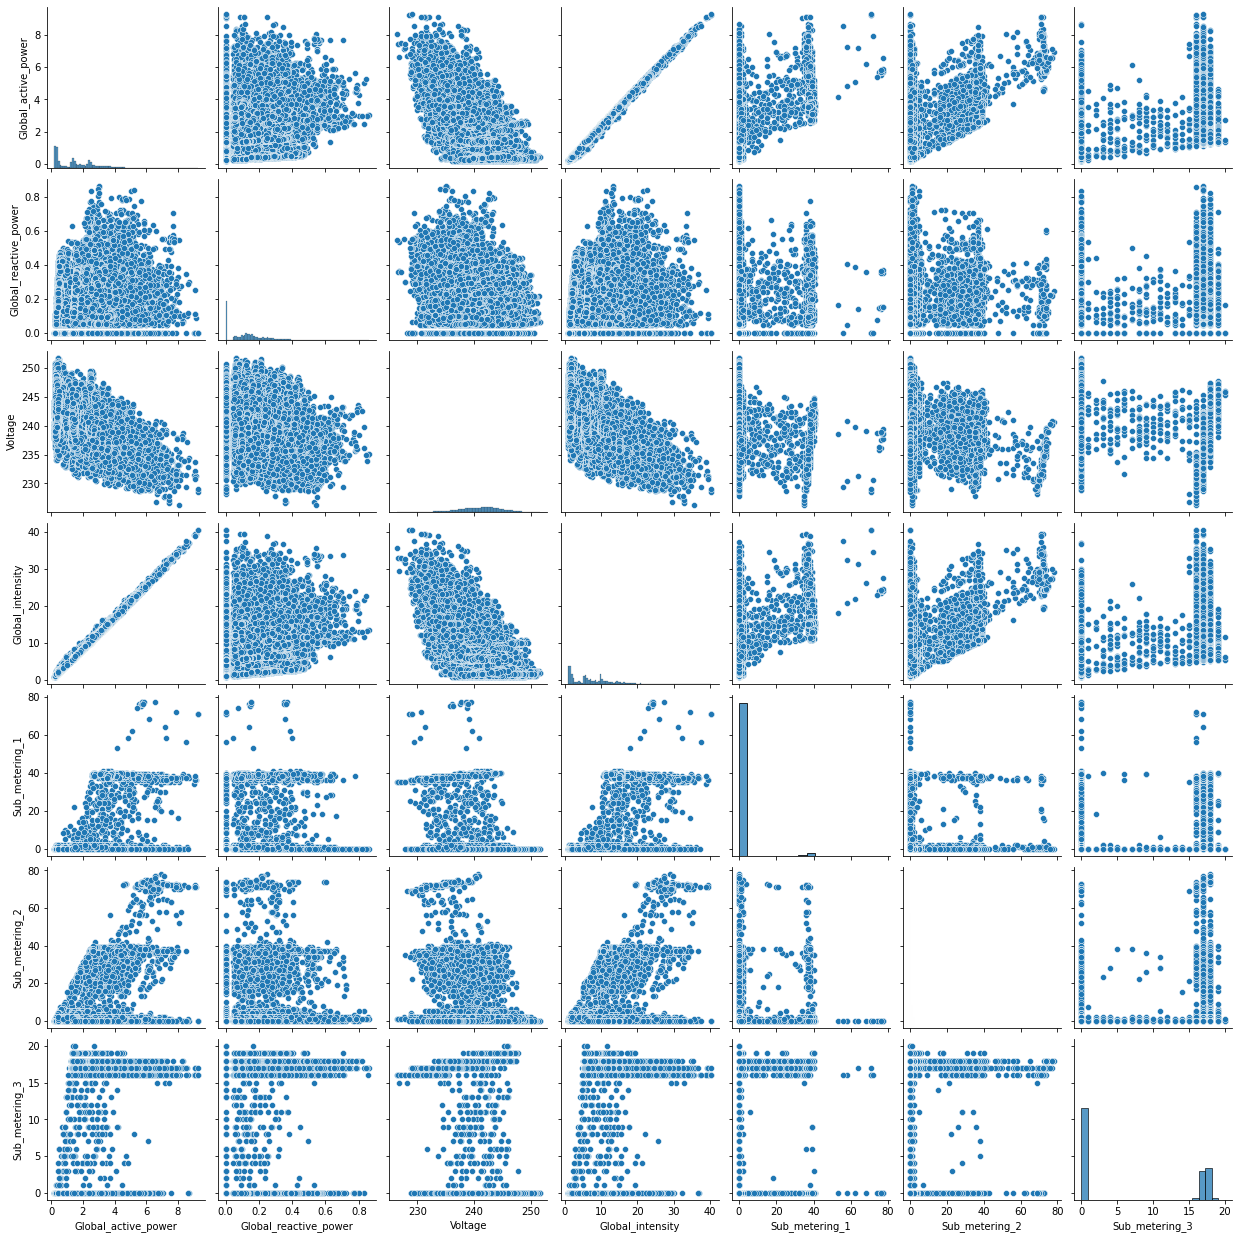

In [ ]:
plt.figure(figsize=(30, 50))
sns.pairplot(df[numeric_features])

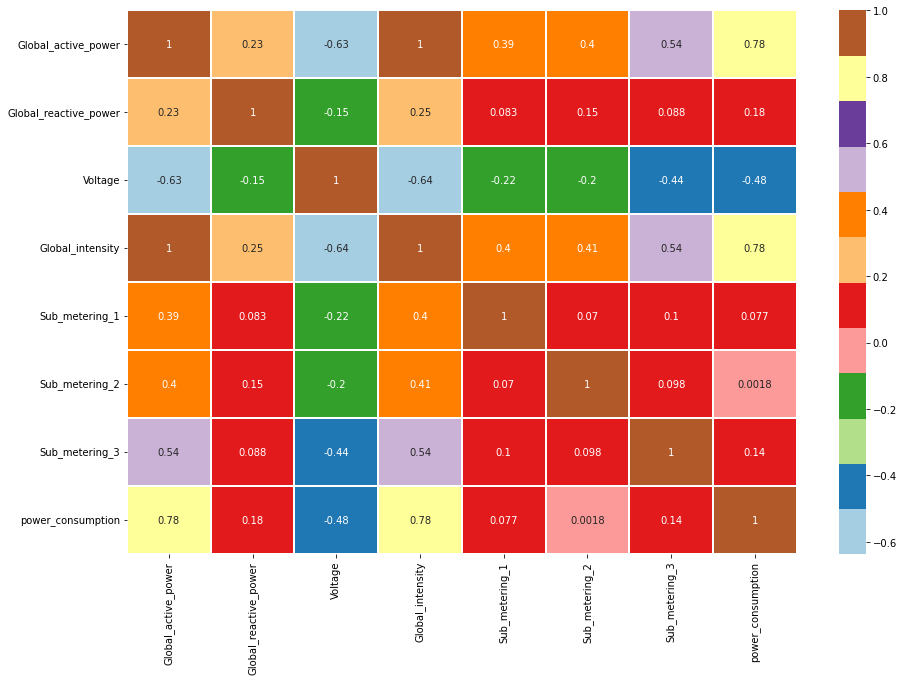

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, 
            cmap = "Paired",xticklabels="auto", yticklabels="auto")

In [ ]:
for i in numeric_features:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_limit=df[i].quantile(0.25)-(IQR*1.5)
    upper_limit=df[i].quantile(0.75)+(IQR*1.5)
    #print('lower_limit',lower_limit), print('upper_limit',upper_limit)
    
    df[i] = np.where(
    df[i]>upper_limit,
    upper_limit,
    np.where(
        df[i]<lower_limit,
        lower_limit,
        df[i]
      )
    )

    

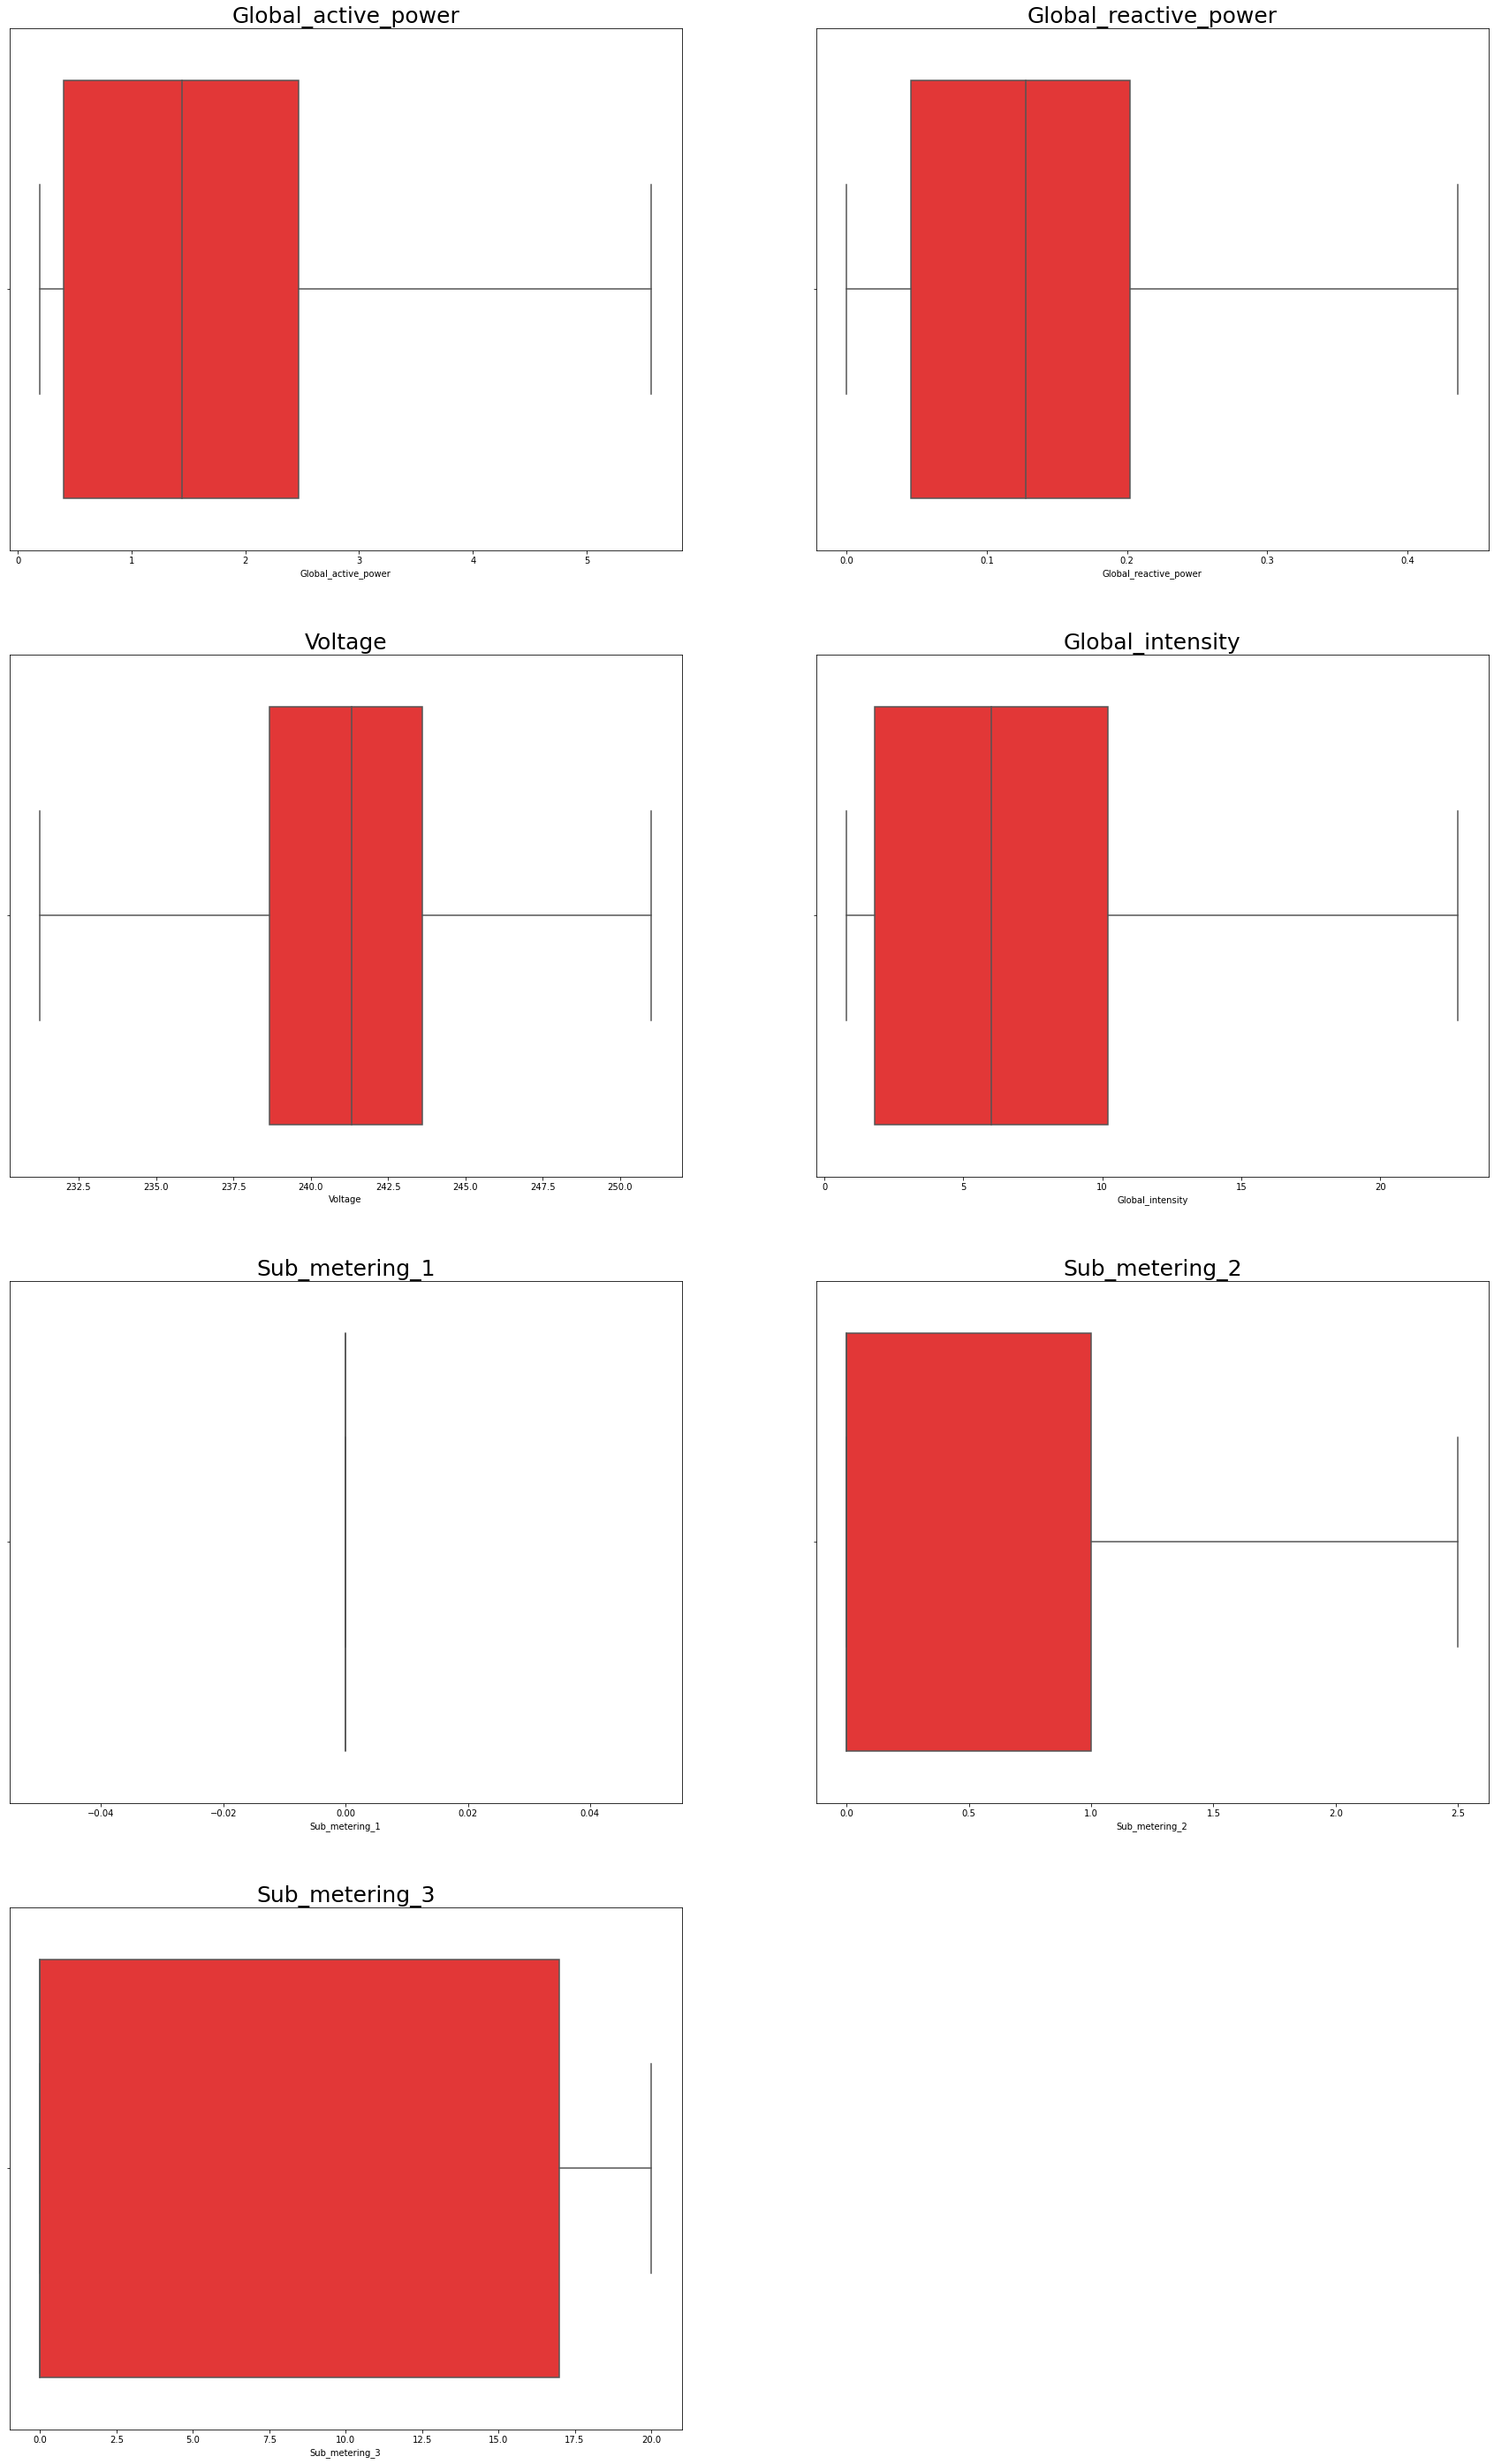

In [ ]:
plt.figure(figsize=(30, 50))
for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data = df,x = df[numeric_features[i]],color='#ff1a1a')
    plt.title(numeric_features[i],color='black',size=25)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


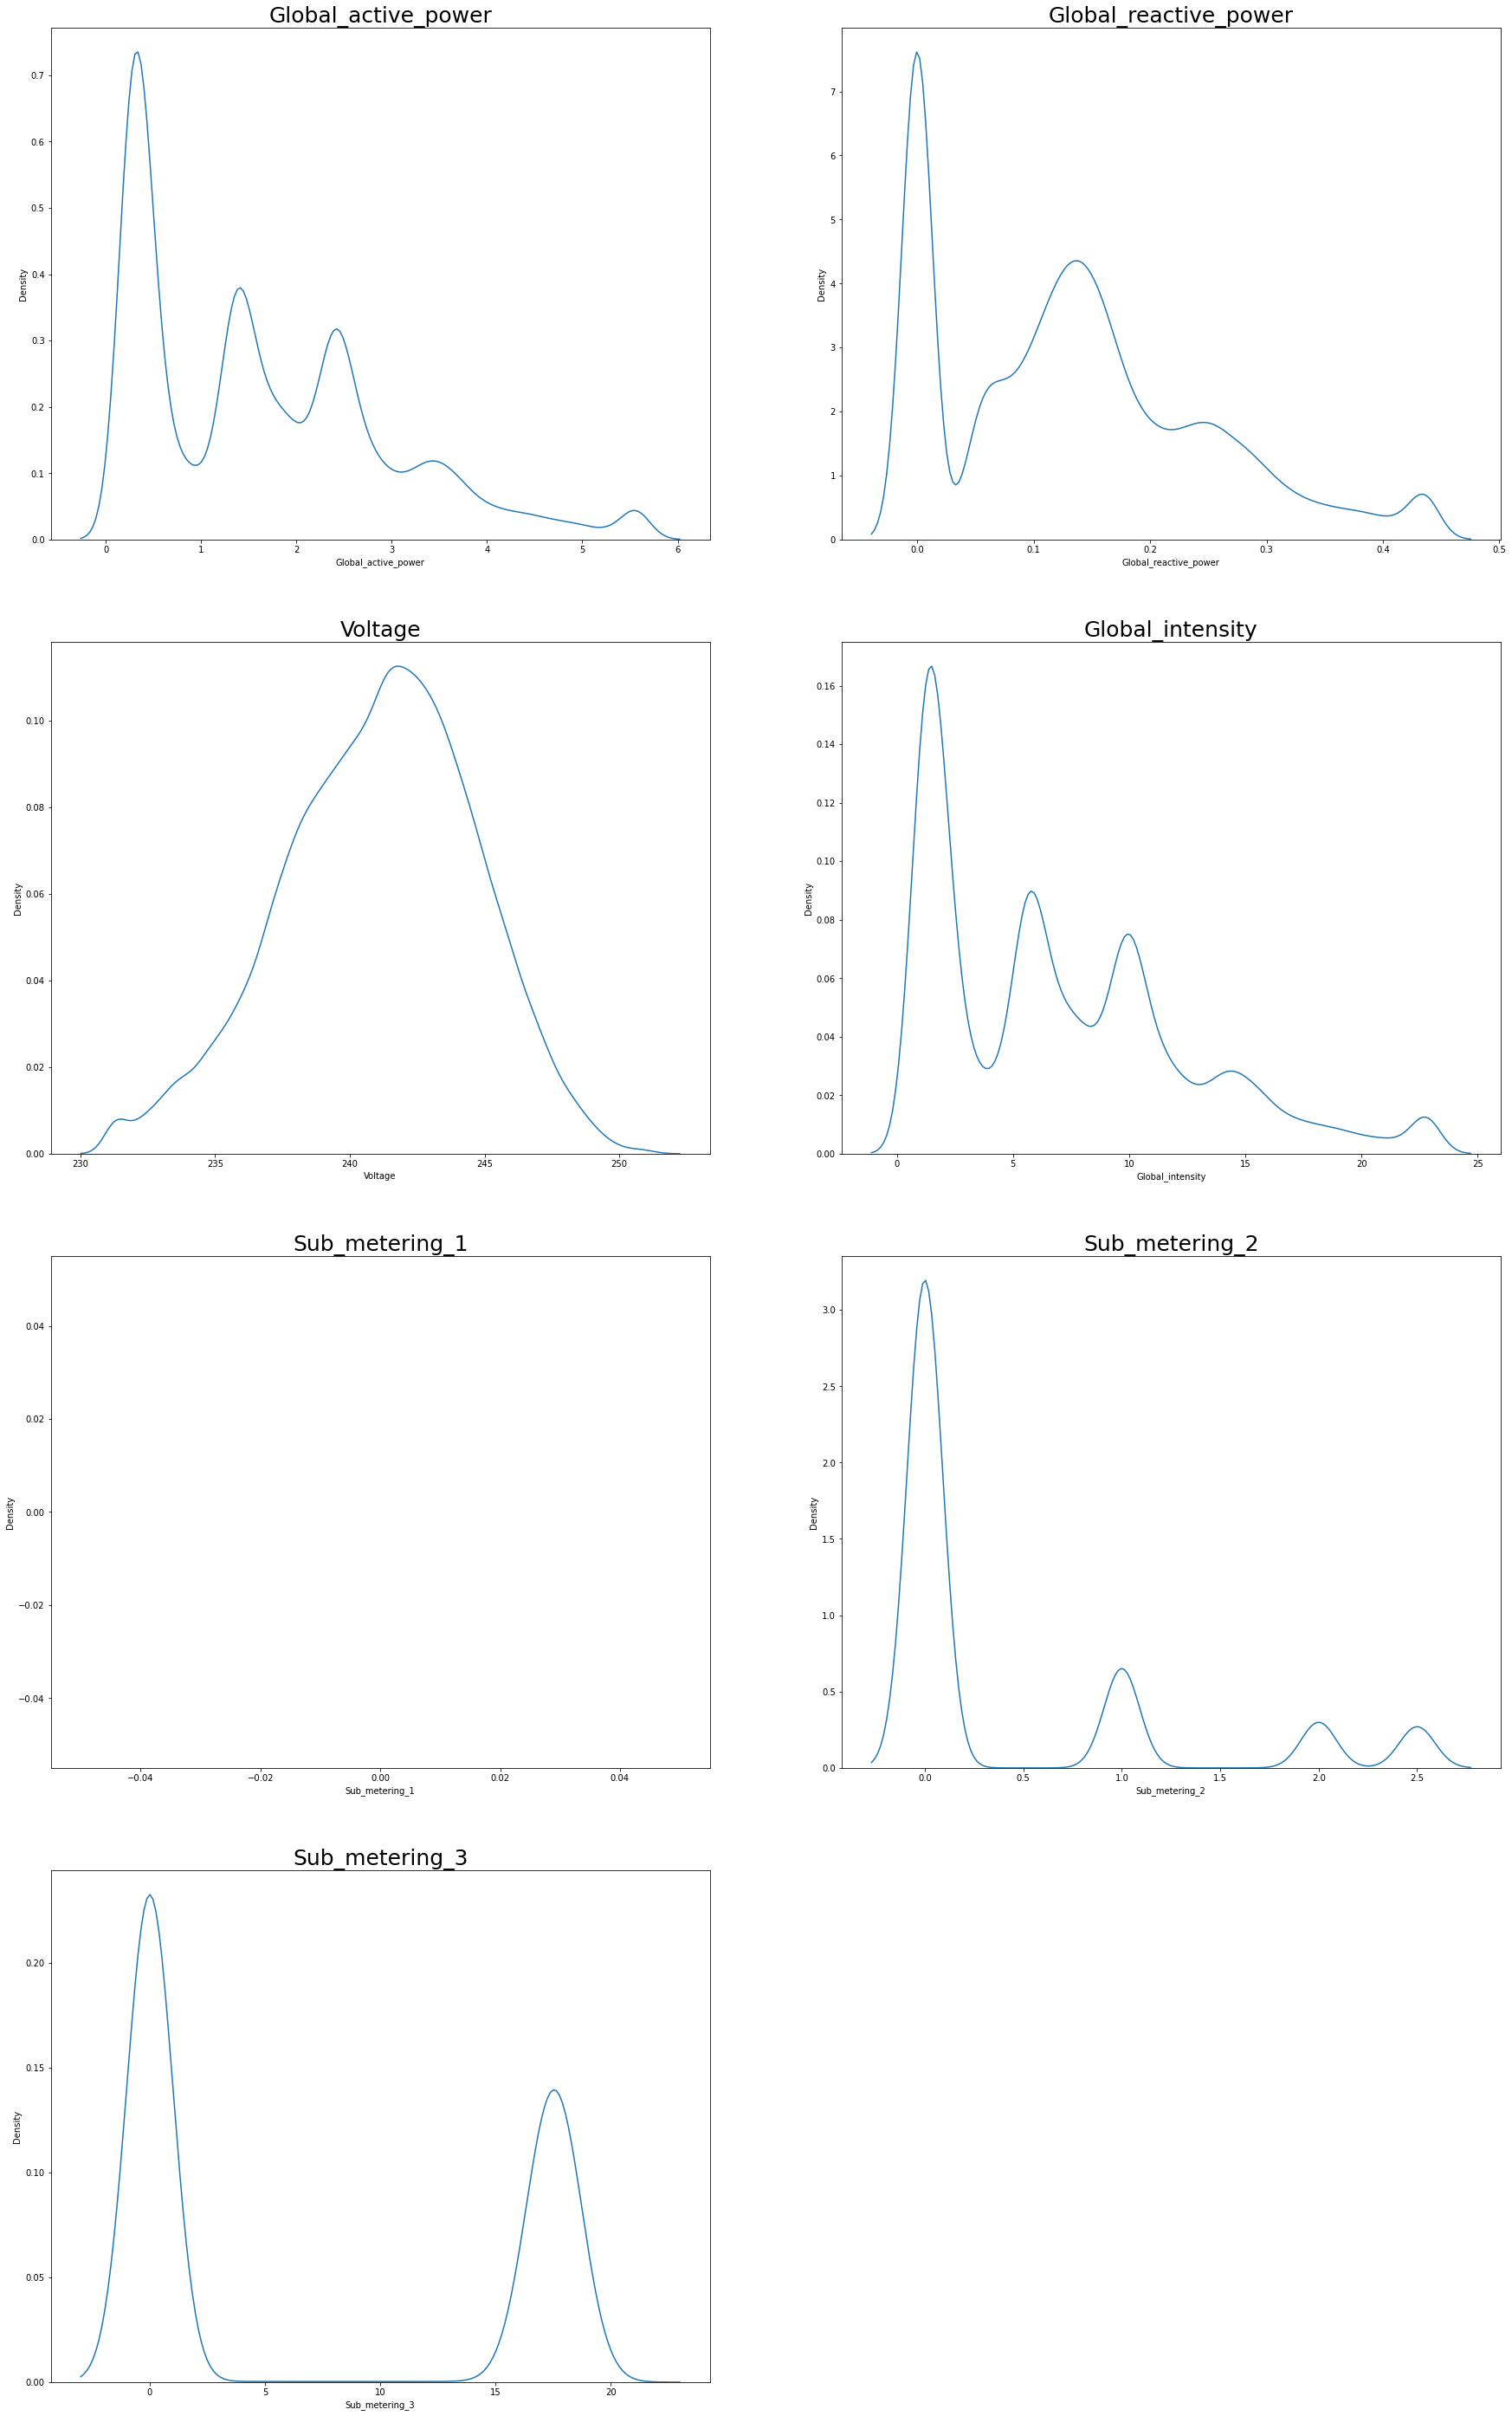

In [ ]:
plt.figure(figsize=(30, 50))
for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(data = df,x = df[numeric_features[i]])
    plt.title(numeric_features[i],color='black',size=25)

In [ ]:
## Independent Features

x=pd.DataFrame(df, columns=numeric_features)  

## Dependent Features

y=pd.DataFrame(df,columns=['power_consumption'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

               variables          VIF
0    Global_active_power  1241.984532
1  Global_reactive_power     3.085848
2                Voltage     3.482710
3       Global_intensity  1258.302862
4         Sub_metering_1          NaN
5         Sub_metering_2     1.590201
6         Sub_metering_3     2.515931


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  ## Initialising

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regression.coef_)

[[ 1.48816674e+01  8.28649019e-01 -3.04722702e-01  2.00809136e+00
   1.77635684e-15 -3.99761899e+00 -6.94281012e+00]]


In [ ]:
print(regression.intercept_)

[17.80463054]


In [ ]:
reg_pred=regression.predict(x_test)
reg_pred

array([[ 7.8257591 ],
       [18.74394057],
       [20.70249076],
       ...,
       [ 4.74050881],
       [28.44530721],
       [10.02230685]])

In [ ]:
# Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('mean_squared_error:',mean_squared_error(y_test,reg_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,reg_pred))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,reg_pred)))

mean_squared_error: 52.27736336036304
mean_absolute_error: 4.571954665901039
mean_squared_error: 7.230308662869313


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7906956596849097


In [ ]:
print('Adjested r score:',1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Adjested r score: 0.7906039285064597


In [ ]:
print('Train accuracy:',regression.score(x_train, y_train))
print('Test accuracy:',regression.score(x_test, y_test))

Train accuracy: 0.7906798357167449
Test accuracy: 0.7906956596849097


# ##########################################

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [ ]:
print('slope:',ridge.coef_)
print('intercept:',ridge.intercept_)

slope: [[14.69423811  0.8262016  -0.30261419  2.19591316  0.         -3.99743464
  -6.94064969]]
intercept: [17.80463054]


In [ ]:
ridge_pred=ridge.predict(x_test)

In [ ]:
# Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('mean_squared_error:',mean_squared_error(y_test,ridge_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,ridge_pred))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,ridge_pred)))

mean_squared_error: 52.27677019618056
mean_absolute_error: 4.572073349622539
mean_squared_error: 7.230267643468017


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print('r2_score',score)
print('Adjested r score:',1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

r2_score 0.7906980345529202
Adjested r score: 0.7906063044152962


In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [ ]:
lasso_pred=lasso.predict(x_test)

In [ ]:
# Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('mean_squared_error:',mean_squared_error(y_test,lasso_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,lasso_pred))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,lasso_pred)))

mean_squared_error: 59.40922574160781
mean_absolute_error: 5.2661978902534905
mean_squared_error: 7.7077380431361195


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print('r2_score',score)
print('Adjested r score:',1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

r2_score 0.7621416230049298
Adjested r score: 0.7620373775354229


# ########################################

In [ ]:
from sklearn.linear_model import ElasticNet
elasticNet=ElasticNet()
elasticNet.fit(x_train,y_train)

ElasticNet()

In [ ]:
elasticNet_pred=elasticNet.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,elasticNet_pred)
print('r2_score',score)
print('Adjested r score:',1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

r2_score 0.6693898871705417
Adjested r score: 0.6692449916790688


# ############################################

In [ ]:
from sklearn.svm import SVR

In [ ]:
SV_reg = SVR()
SV_reg.fit(x_train, y_train.values.ravel())

SVR()

In [ ]:
SV_reg_pred=SV_reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,SV_reg_pred)
print('r2_score',score)
print('Adjested r score:',1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

r2_score 0.8705619729474704
Adjested r score: 0.8705052445359147


# HyperParameter Tuning

In [ ]:
# Using Grid Search CV for HyperParameter Tuning
from sklearn.model_selection import GridSearchCV


In [106]:
from sklearn import svm
# Create the param grid
params = {'kernel':['rbf','linear','poly']} 
svr_model = GridSearchCV(estimator = SVR(), param_grid = params, cv = 5, n_jobs = -1)


In [107]:
svr_model.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'linear', 'poly']})

In [108]:
print(svr_model.best_params_)
print(svr_model.best_score_)

{'kernel': 'rbf'}
0.8690974425137021


In [109]:
svr_pred = svr_model.predict(x_test)

In [110]:
# Evaluating the Algorithm
# R Square
score = r2_score(y_test, svr_pred)
print('r2 score',score)

r2 score 0.8705619729474704


In [111]:
# Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8705052445359147